In [1]:
import numpy as np
import cv2
from matplotlib import pyplot as plt


# Question 3:


part 2:


In [2]:
# define image1 here
image1 = np.array(
    [
        [150, 151, 153, 155, 156, 155, 154],
        [150, 151, 153, 155, 156, 155, 154],
        [150, 151, 153, 155, 156, 155, 154],
        [150, 151, 153, 155, 156, 155, 154],
        [150, 151, 153, 155, 156, 155, 154]
    ], dtype=np.uint8
)


In [3]:
# code here
# first define a function for calculating histogram

# source : https://www.tutorialspoint.com/opencv-python-how-to-compute-and-plot-the-histogram-of-a-region-of-an-image
def calc_hist(image):
    hist = cv2.calcHist([image], [0], None, [256], [0, 256])
    return(hist)


Text(0.5, 1.0, 'histogram')

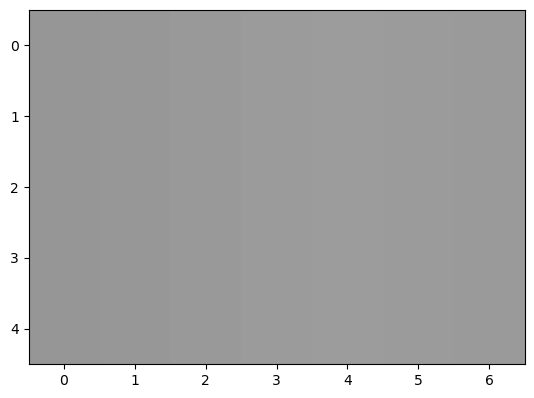

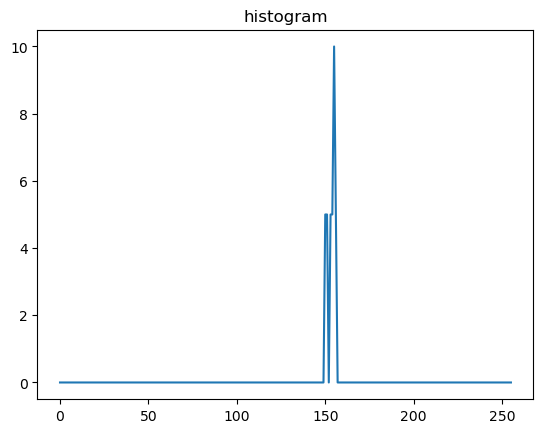

In [4]:
# dont change this cell
plt.imshow(image1, cmap='gray', vmin=0, vmax=255)
plt.figure()
plt.plot(calc_hist(image1))
plt.title('histogram')


In [5]:
# code here
# define a function (stretch) for stretching(input:image , output: stretched image)


def stretch_hist(image):
    '''
    don't use libraries
    input(s):
      image (ndarray): input image
    output(s):
      output_image (ndarray): enhanced image with histogram stretching
    '''
    output_image = image.copy()
    # Start
    MIN = 0
    MAX = 255
    f_min = np.min(image)
    f_max = np.max(image)

    for row in range(image.shape[0]):
        for col in range(image.shape[1]):
            output_image[row][col] = (
                (image[row][col] - f_min) / (f_max - f_min)) * (MAX - MIN) + MIN
    # End
    return output_image


Text(0.5, 1.0, 'new histogram')

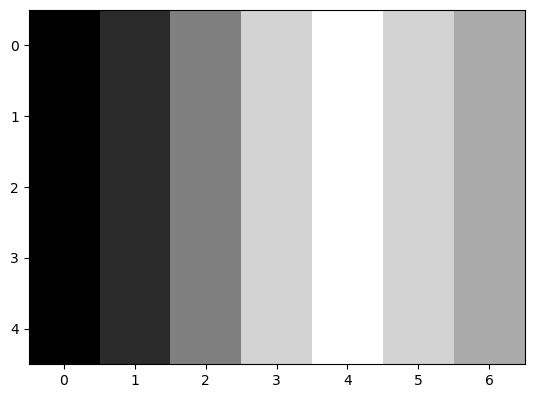

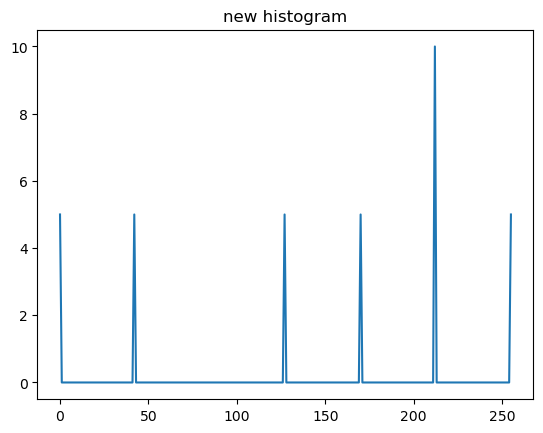

In [6]:
# dont change this cell
plt.imshow(stretch_hist(image1), cmap='gray', vmin=0, vmax=255)
plt.figure()
plt.plot(calc_hist(stretch_hist(image1)))
plt.title('new histogram')


# part3


Text(0.5, 1.0, 'histogram')

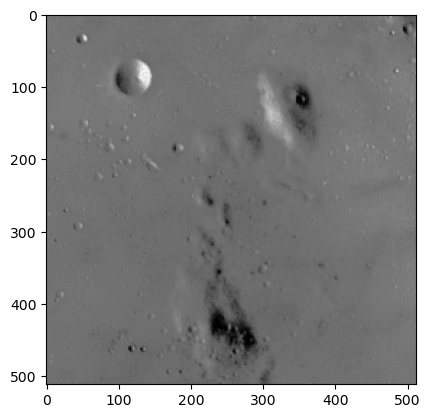

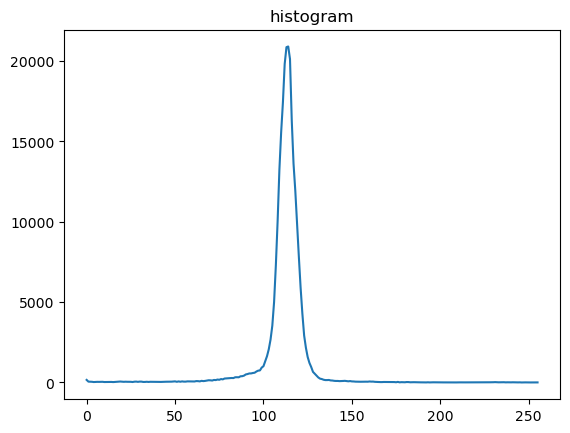

In [15]:
# first read the image and show it.(image2)

import sys

# Read the input image
image2 = cv2.imread(cv2.samples.findFile("Q3_image/image2.jpg"), cv2.IMREAD_GRAYSCALE)
# image2 = cv2.imread(cv2.samples.findFile("Q3_image/image2.jpg"), 0)
if image2 is None:
    sys.exit("Could not read the image.")

# print(image2.shape)
# cv2.imshow('image2',image2)
# cv2.waitKey(0)
plt.imshow(image2, cmap='gray', vmin=0, vmax=255)
plt.figure()
plt.plot(calc_hist(image2))
plt.title('histogram')


Text(0.5, 1.0, 'new histogram')

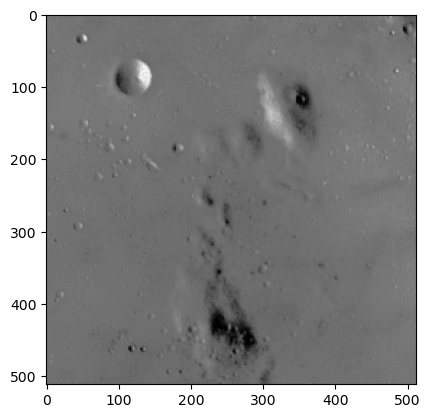

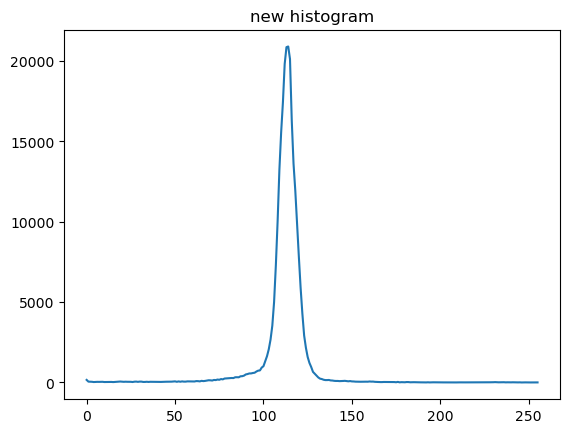

In [16]:
# use stretch function to improve quality of the image and show it

plt.imshow(stretch_hist(image2), cmap='gray', vmin=0, vmax=255)
plt.figure()
plt.plot(calc_hist(stretch_hist(image2)))
plt.title('new histogram')


جواب بخش ج
خیر تصویر بهبود نیافت و هیستوگرام آن کشیده نشد.
دلیل این اتفاق این است که روشنایی های نزدیک 0 و 255 دارای تکرار کمی هستند به همین دلیل باعث می شوند که
f_max = 255, f_min = 0
شوند و عملا هیستوگرام تصویر کشیده نشود.
با توجه به فرمول کشش هیستوگرام می توان به این موضوع پی ببریم
برای بهبود می توانیم بجای کشش هیستوگرام از برش هیستوگرام استفاده کنیم
histogram_steching --> histogram_clipping
در برش هیستوگرام، بخشی از مولفههای پائین و بالا در نمودار هیستوگرام را قطع میکنیم


Histogram stretching is a technique used to enhance the contrast of an image by stretching its histogram over the full range of intensity values. While this technique can be effective in many cases, there are situations where it may not work as expected. Here are a few reasons why this may happen:

1.Limited dynamic range: If the image has a limited dynamic range, histogram stretching may not be effective. This is because there may not be enough information in the image to stretch the histogram over a significant range of intensity values.

2.Saturation: If the image is already highly saturated, histogram stretching may not work. This is because stretching the histogram will not bring back information that is already lost due to saturation.

3.Non-linear histogram: If the image has a non-linear histogram, histogram stretching may not work as expected. This can happen when the image has a complex distribution of intensity values, such as when there are multiple peaks in the histogram.

4.Noise: If the image has significant noise, histogram stretching may not be effective. This is because stretching the histogram can amplify the noise, leading to an image that appears even more noisy.

5.Incorrect parameter settings: If the parameters used for histogram stretching are not appropriate for the image, the technique may not work. For example, if the stretching is too aggressive, it can lead to artifacts in the image, making it look unnatural.

Overall, while histogram stretching can be a useful tool for enhancing image contrast, it is not a universal solution and may not work in all cases. It is important to understand the limitations of this technique and to use it appropriately.

src: https://chat.openai.com/

In [33]:
# define new function that can improve this image

def modified_stretch_hist(image):
    '''
    don't use libraries
    input(s):
      image (ndarray): input image
    output(s):
      output_image (ndarray): enhanced image with modified histogram stretching
    '''
    output_image = image.copy()
    ############
    # Your code
    # using histogram clipping

    sorted_hist_vlaues = np.sort(image.flatten())
    sorted_hist_vlaues_len = len(sorted_hist_vlaues)
    # print(sorted_hist_vlaues.shape[0]) # (786432,)

    f_2 = sorted_hist_vlaues[int(np.round(0.02 * sorted_hist_vlaues_len))]
    f_98 = sorted_hist_vlaues[int(np.round(0.98 * sorted_hist_vlaues_len))]

    # we can use less clipping than 98% and 2% e.g.
    # f_1 = sorted_hist_vlaues[int(np.round(0.01 * sorted_hist_vlaues_len))]
    # f_99 = sorted_hist_vlaues[int(np.round(0.99 * sorted_hist_vlaues_len))]

    # we can use more clipping even more than 98% and 2% 
    # f_5 = sorted_hist_vlaues[int(np.round(0.05 * sorted_hist_vlaues_len))]
    # f_95 = sorted_hist_vlaues[int(np.round(0.95 * sorted_hist_vlaues_len))]

    MIN = 0
    MAX = 255

    for row in range(image.shape[0]):
        for col in range(image.shape[1]):
            if image[row][col] < f_2:
                output_image[row][col] = MIN
            elif image[row][col] > f_98:
                output_image[row][col] = MAX
            else:
                output_image[row][col] = (
                    (image[row][col] - f_2) / (f_98 - f_2)) * (MAX - MIN) + MIN
    # End
    ############
    return output_image


Text(0.5, 1.0, 'clipped histogram')

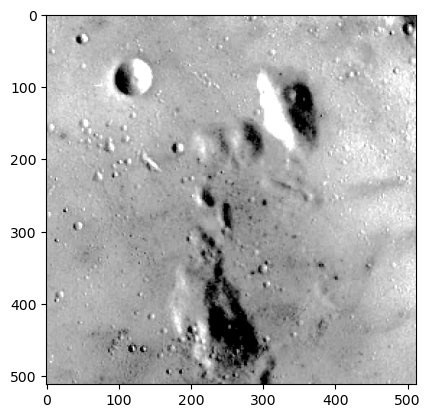

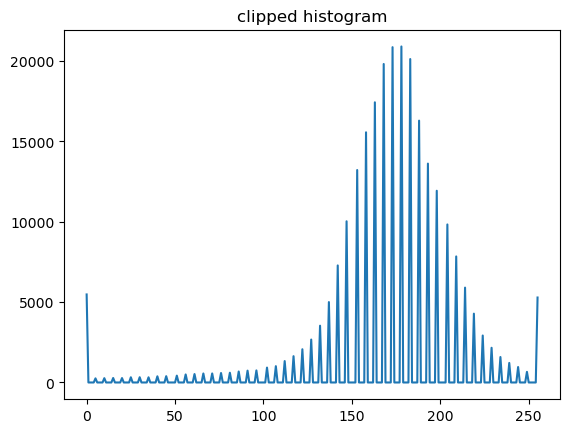

In [35]:
# try your new function and show the result

plt.imshow(modified_stretch_hist(image2), cmap='gray', vmin=0, vmax=255)
plt.figure()
plt.plot(calc_hist(modified_stretch_hist(image2)))
plt.title('clipped histogram')


Histogram clipping is a technique used to adjust the intensity values of an image by limiting the range of values that are displayed. This technique involves setting a minimum and maximum intensity value and then mapping all values outside that range to either the minimum or maximum value.

Histogram clipping is often used to reduce the impact of extreme pixel values in an image. For example, if an image has a few pixels with very high intensity values, these pixels can dominate the histogram and make it difficult to see details in the rest of the image. By clipping the histogram, these extreme values are mapped to a less extreme value, allowing other details in the image to become more visible.

Histogram clipping can also be used to adjust the contrast of an image. By setting the minimum and maximum values appropriately, the range of intensities in the image can be expanded or contracted, leading to a change in overall contrast.

However, it's important to note that histogram clipping can lead to loss of information in an image, particularly if a large proportion of pixels are clipped. In addition, the specific implementation of histogram clipping can vary depending on the software or algorithm used, so it's important to carefully evaluate the results of histogram clipping to ensure that the desired effect has been achieved.

src: https://chat.openai.com/